In [122]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [123]:
df=pd.read_csv("game data.csv")

In [124]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [125]:
df=df.drop(["Days"],axis=1)

In [126]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [127]:
df.isnull().sum()

Outlook         0
Temprature      0
Routine         0
Wear Jacket?    0
dtype: int64

In [128]:
df.describe()

,Outlook,Temprature,Routine,Wear Jacket?
count,8,8,8,8
unique,2,2,2,2
top,Sunny,Cold,Indoor,No
freq,4,4,4,5


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 388.0+ bytes


In [130]:
df.value_counts()

Outlook  Temprature  Routine  Wear Jacket?
Cloudy   Cold        Indoor   Yes             1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Sunny    Cold        Indoor   No              1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Name: count, dtype: int64

In [131]:
df["Outlook"].value_counts()

Outlook
Sunny     4
Cloudy    4
Name: count, dtype: int64

In [132]:
df["Temprature"].value_counts()

Temprature
Cold    4
Warm    4
Name: count, dtype: int64

In [133]:
df["Routine"].value_counts()

Routine
Indoor     4
Outdoor    4
Name: count, dtype: int64

In [134]:
x=df.drop(["Wear Jacket?"],axis=1)
y=df.drop(["Wear Jacket?"],axis=1)

In [135]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [136]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

In [137]:
y.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

In [138]:
x[['Outlook', 'Temprature', 'Routine']]=x[['Outlook', 'Temprature', 'Routine']].apply(lambda col:le.fit_transform(col))

In [139]:
x.head(6)

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1
5,1,1,1


In [140]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [141]:
#decesion Tree

In [142]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy")

In [143]:
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [144]:
clf.predict([[1,0,0]])

array([['Sunny', 'Cold', 'Indoor ']], dtype=object)

In [146]:
clf.predict([[0,0,1]])

array([['Cloudy', 'Cold', 'Outdoor']], dtype=object)

[Text(0.5, 0.875, 'x[0] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [[4, 4]\n[4, 4]\n[4, 4]]'),
 Text(0.25, 0.625, 'x[1] <= 0.5\nentropy = 0.667\nsamples = 4\nvalue = [[4, 0]\n[2, 2]\n[2, 2]]'),
 Text(0.125, 0.375, 'x[2] <= 0.5\nentropy = 0.333\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[1, 1]]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[1, 0]]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]]'),
 Text(0.375, 0.375, 'x[2] <= 0.5\nentropy = 0.333\nsamples = 2\nvalue = [[2, 0]\n[0, 2]\n[1, 1]]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[0, 1]]'),
 Text(0.75, 0.625, 'x[1] <= 0.5\nentropy = 0.667\nsamples = 4\nvalue = [[0, 4]\n[2, 2]\n[2, 2]]'),
 Text(0.625, 0.375, 'x[2] <= 0.5\nentropy = 0.333\nsamples = 2\nvalue = [[0, 2]\n[2, 0]\n[1, 1]]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [[0,

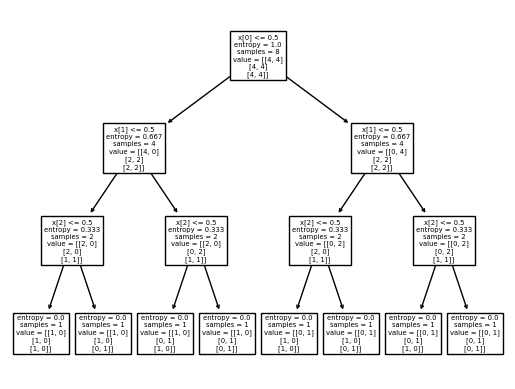

In [147]:
tree.plot_tree(clf)

[Text(0.5, 0.875, 'Outlook <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [[4, 4]\n[4, 4]\n[4, 4]]'),
 Text(0.25, 0.625, 'Temprature <= 0.5\nentropy = 0.667\nsamples = 4\nvalue = [[4, 0]\n[2, 2]\n[2, 2]]'),
 Text(0.125, 0.375, 'Routine <= 0.5\nentropy = 0.333\nsamples = 2\nvalue = [[2, 0]\n[2, 0]\n[1, 1]]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[1, 0]]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[1, 0]\n[0, 1]]'),
 Text(0.375, 0.375, 'Routine <= 0.5\nentropy = 0.333\nsamples = 2\nvalue = [[2, 0]\n[0, 2]\n[1, 1]]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[1, 0]]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [[1, 0]\n[0, 1]\n[0, 1]]'),
 Text(0.75, 0.625, 'Temprature <= 0.5\nentropy = 0.667\nsamples = 4\nvalue = [[0, 4]\n[2, 2]\n[2, 2]]'),
 Text(0.625, 0.375, 'Routine <= 0.5\nentropy = 0.333\nsamples = 2\nvalue = [[0, 2]\n[2, 0]\n[1, 1]]'),
 Text(0.5625, 0.125, 'entropy = 0.0\ns

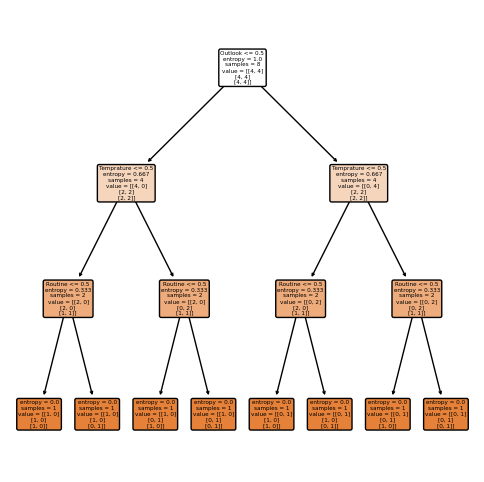

In [148]:
plt.figure(figsize=(6,6))
tree.plot_tree(clf,feature_names=x.columns, filled=True, rounded=True )